<a href="https://colab.research.google.com/github/DeveshValluru/ML-Projects/blob/main/BigMartSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

DAta Collection and analysis

In [ ]:
big_mart_dataset = pd.read_csv('/content/BigSale.csv')
big_mart_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
big_mart_dataset.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [ ]:
big_mart_dataset.shape

(8523, 12)

In [ ]:
big_mart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical features:


 1   Item_Identifier
 2   Item_Fat_Content 
 3   Item_Type 
 4   Outlet_Identifier  
 5   Outlet_Size  
 6   Outlet_Location_Type
 7   Outlet_Type 



In [ ]:
big_mart_dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

HAndling Missing VAlues


Mean ---> average values


Mode ---> Most repeated value

In [ ]:
#mean value of item weigght column
big_mart_dataset['Item_Weight'].mean()

12.857645184135976

In [ ]:
#Filling the missing values in"item wieght" column with mean values

big_mart_dataset['Item_Weight'].fillna(big_mart_dataset['Item_Weight'].mean(), inplace=True)

Removed the missing values in item weight

In [ ]:
big_mart_dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# mode of "Outlet_Size" column
big_mart_dataset['Outlet_Size'].mode()

0    Medium
dtype: object

In [ ]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = big_mart_dataset.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

Lamda in the above is similar to def fuction but def is used to use the function how many ever times we want just by calling it whereas lambda is used to use that only that one time and we dont have to worry about space afteer its usecase is done.



In [ ]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [ ]:
missing_values =  big_mart_dataset['Outlet_Size'].isnull()

In [ ]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [ ]:
#replacing missing values with mode

big_mart_dataset.loc[missing_values, 'Outlet_Size'] = big_mart_dataset.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

Hence removed the missing values

In [ ]:
big_mart_dataset.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

DAta Analysis

In [ ]:
big_mart_dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Feastures

In [ ]:
sns.set()

<Figure size 432x432 with 0 Axes>

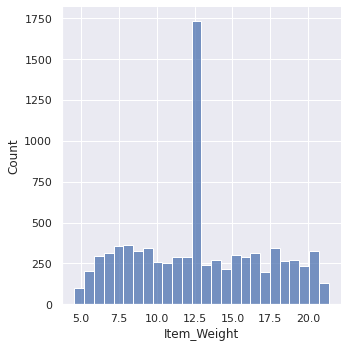

In [ ]:
#item _weight distribution

plt.figure(figsize=(6,6))
sns.displot(big_mart_dataset['Item_Weight'])
plt.show()

Have almost eqaul values expect at 12.5

<Figure size 432x432 with 0 Axes>

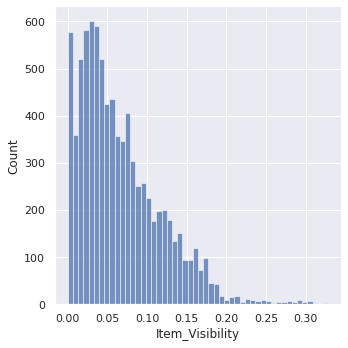

In [ ]:
#item _visibilty distribution

plt.figure(figsize=(6,6))
sns.displot(big_mart_dataset['Item_Visibility'])
plt.show()

plot is heavily spread in one side of the graph that is till 0.1

<Figure size 432x432 with 0 Axes>

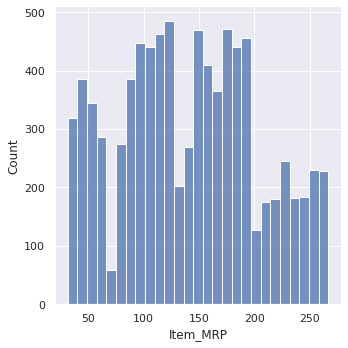

In [ ]:
#item _mrp distribution

plt.figure(figsize=(6,6))
sns.displot(big_mart_dataset['Item_MRP'])
plt.show()

plot is variable 

<Figure size 432x432 with 0 Axes>

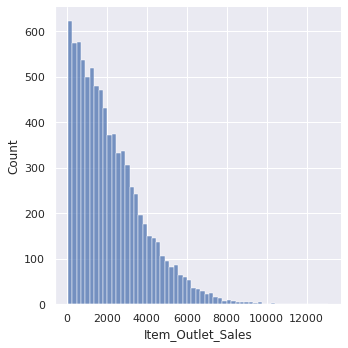

In [ ]:
#item outlet_sales distribution

plt.figure(figsize=(6,6))
sns.displot(big_mart_dataset['Item_Outlet_Sales'])
plt.show()

skewed

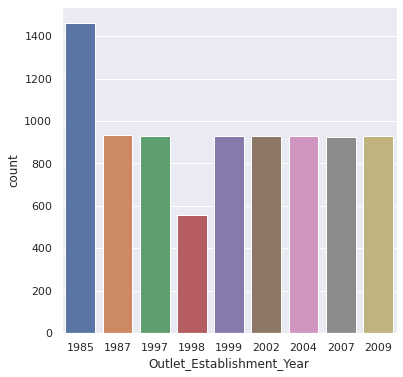

In [ ]:
#outlet_establishment_year count

plt.figure(figsize=(6,6))
sns.countplot(x= 'Outlet_Establishment_Year',data = big_mart_dataset)
plt.show()

Categorical Features

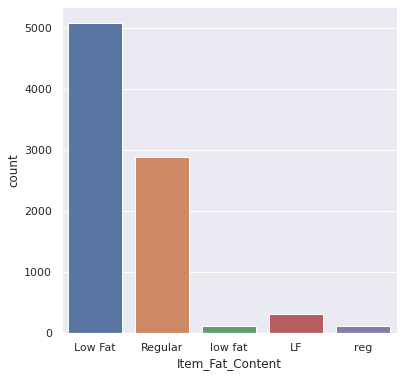

In [ ]:
#item fat content count
plt.figure(figsize=(6,6))
sns.countplot(x= 'Item_Fat_Content',data = big_mart_dataset)
plt.show()

Here Low FAt lowfat and LF all are same and we to clean the data in order tp mix all these to one count and similarly regular and reg both same

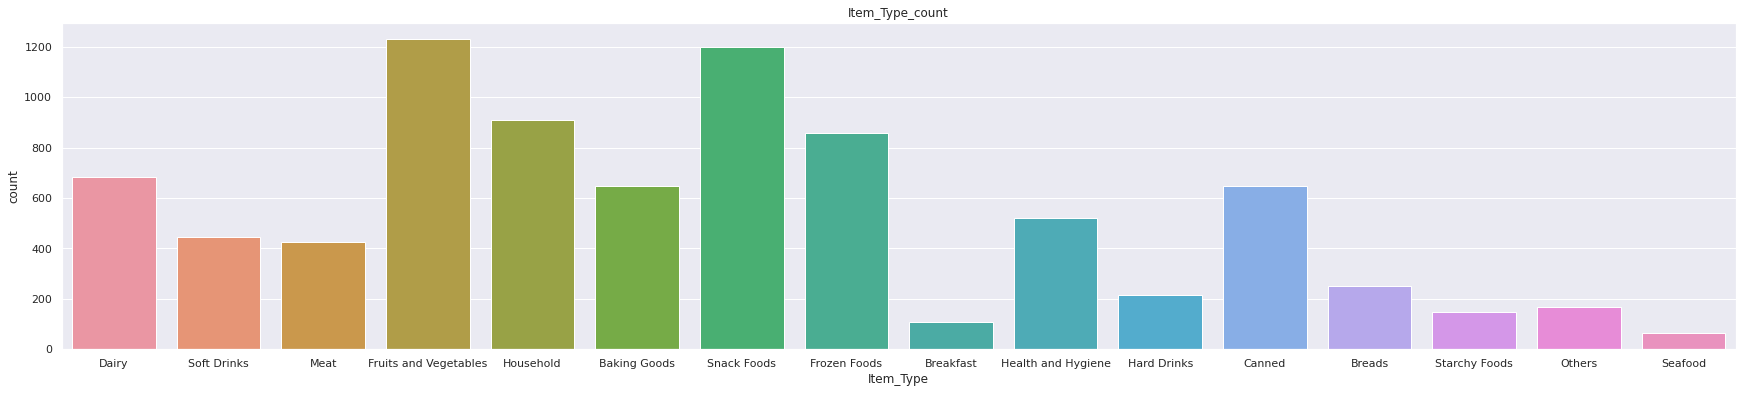

In [ ]:
#item_type count

plt.figure(figsize=(30,6))
sns.countplot(x= 'Item_Type',data = big_mart_dataset)
plt.title('Item_Type_count')
plt.show()

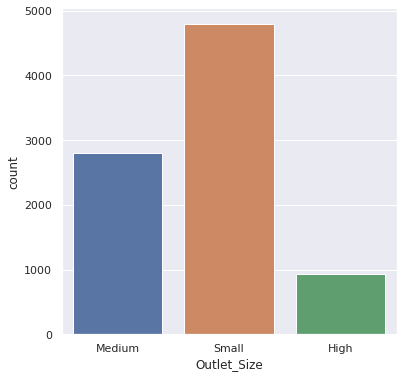

In [ ]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=big_mart_dataset)
plt.show()

Data PreProcessing

In [ ]:
big_mart_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Chaging the low fat ,lf LowFat with same thing

In [ ]:
big_mart_dataset['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
big_mart_dataset.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [ ]:
big_mart_dataset['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Label Encoding Transforming categorical to numerical

In [ ]:
encoder = LabelEncoder()

In [ ]:
big_mart_dataset['Item_Identifier'] = encoder.fit_transform(big_mart_dataset['Item_Identifier'])
big_mart_dataset['Item_Fat_Content'] = encoder.fit_transform(big_mart_dataset['Item_Fat_Content'])
big_mart_dataset['Item_Type'] = encoder.fit_transform(big_mart_dataset['Item_Type'])
big_mart_dataset['Outlet_Identifier'] = encoder.fit_transform(big_mart_dataset['Outlet_Identifier'])
big_mart_dataset['Outlet_Size'] = encoder.fit_transform(big_mart_dataset['Outlet_Size'])
big_mart_dataset['Outlet_Location_Type'] = encoder.fit_transform(big_mart_dataset['Outlet_Location_Type'])
big_mart_dataset['Outlet_Type'] = encoder.fit_transform(big_mart_dataset['Outlet_Type'])


Splitting as Features and target

In [ ]:
X = big_mart_dataset.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_dataset['Item_Outlet_Sales']

In [ ]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [ ]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


Splitting the data into test and train data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


Model Training


XGBBoost Regessor

In [ ]:
regressor = XGBRegressor()

In [ ]:
regressor.fit(X_train, Y_train)


[15:13:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [ ]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [ ]:
print('R Squared value = ', r2_train)

R Squared value =  0.6364457030941357


In [ ]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [ ]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [ ]:
print('R Squared value = ', r2_test)

R Squared value =  0.5867640914432671
